In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report,
                             accuracy_score)


In [58]:
df =  pd.read_csv('aids_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

In [59]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [60]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [61]:
#cek missing Values
print(df.isnull().sum())

time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
cid        0
dtype: int64


In [62]:
#cek duplicates
print("Jumlah data duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

Jumlah data duplikat: 0


In [63]:
#outlier
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outlier_cond = (df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))
print("\nJumlah outlier pada age:", outlier_cond.sum())


Jumlah outlier pada age: 52


cid
0    1618
1     521
Name: count, dtype: int64
cid
0    0.756428
1    0.243572
Name: proportion, dtype: float64


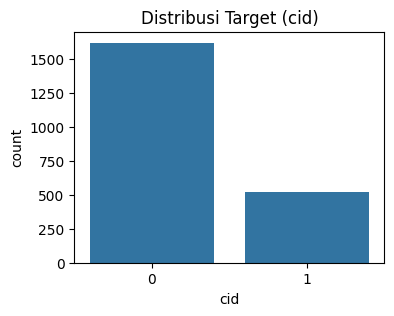

In [64]:
#cek keseimbangan target
print(df['cid'].value_counts())
print(df['cid'].value_counts(normalize=True))

plt.figure(figsize=(4,3))
sns.countplot(x='cid', data=df)
plt.title("Distribusi Target (cid)")
plt.show()

<Figure size 1200x800 with 0 Axes>

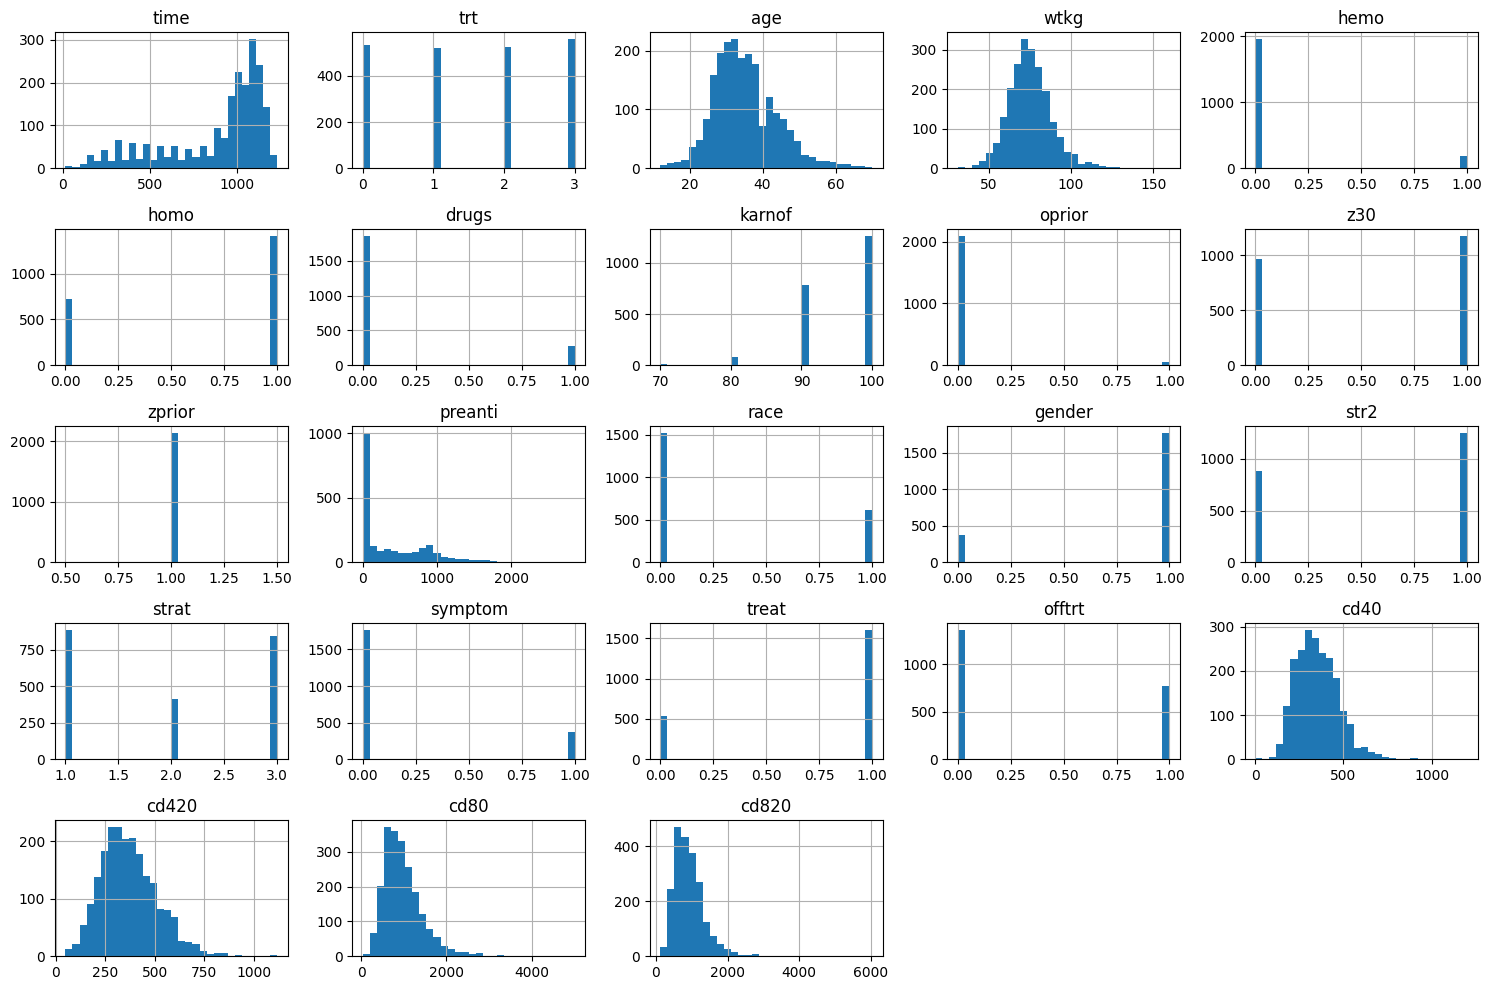

In [65]:
#Distribuci data
plt.figure(figsize=(12,8))
df.drop(columns=['cid']).hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

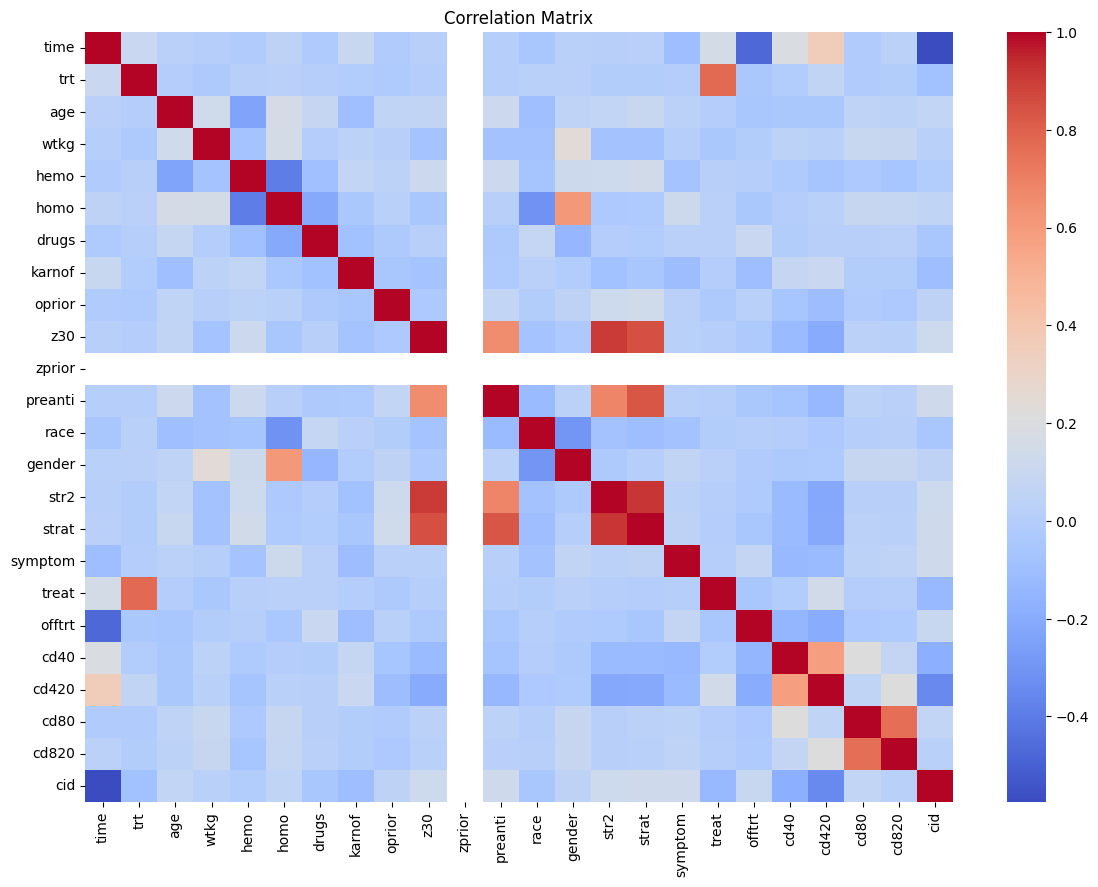

In [66]:
#correlation
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [67]:
print("\n===== Korelasi Fitur dengan Target (cid) =====")
print(corr['cid'].sort_values(ascending=False))


===== Korelasi Fitur dengan Target (cid) =====
cid        1.000000
strat      0.131441
symptom    0.129234
preanti    0.128453
z30        0.125488
str2       0.123390
offtrt     0.092850
age        0.070384
cd80       0.065338
homo       0.054279
gender     0.045118
oprior     0.041251
cd820      0.019494
wtkg       0.016205
hemo      -0.011154
drugs     -0.049794
race      -0.055977
trt       -0.084360
karnof    -0.102944
treat     -0.129560
cd40      -0.185647
cd420     -0.345908
time      -0.574989
zprior          NaN
Name: cid, dtype: float64


In [39]:
#df['gender'] = df['gender'].astype('category')
#df['gender'] = df['gender'].cat.codes

In [68]:
X = df.drop(columns=['cid'])  # Fitur
y = df['cid']                 # Target

Split Data: Cross-Validation & Holdout (Testing Dataset)

In [69]:
#a. Holdout (Testing Dataset)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# Split train-test (holdout)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [72]:
#b. Cross-Validation (Misal 5-fold)

#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression

#model = LogisticRegression()
#scores = cross_val_score(model, X_train, y_train, cv=5)
#print("Cross-validation scores:", scores)
#print("Mean CV Score:", scores.mean())

In [73]:
#model.fit(X_train, y_train)


In [74]:
#from sklearn.metrics import accuracy_score, classification_report

#y_pred = model.predict(X_test)
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

Modelling


======= Random Forest =======


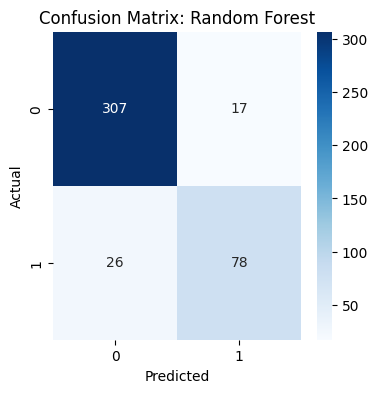

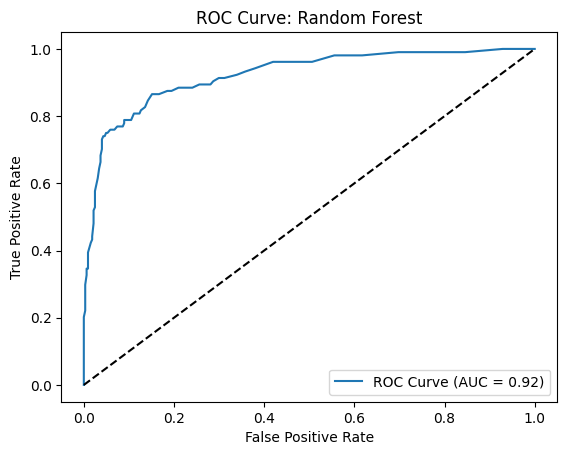

Akurasi: 0.900
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       324
           1       0.82      0.75      0.78       104

    accuracy                           0.90       428
   macro avg       0.87      0.85      0.86       428
weighted avg       0.90      0.90      0.90       428


======= SVM =======


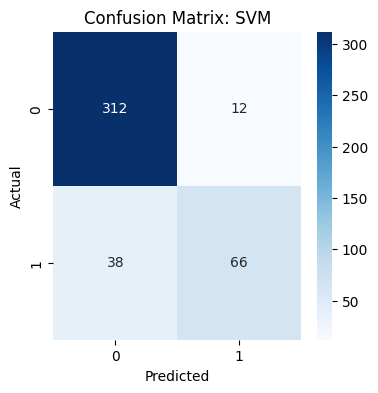

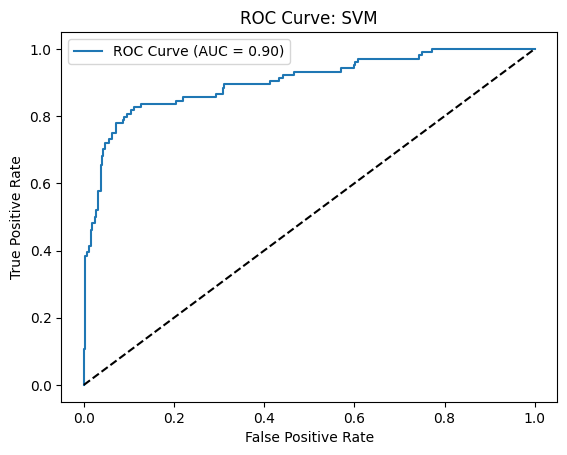

Akurasi: 0.883
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       324
           1       0.85      0.63      0.73       104

    accuracy                           0.88       428
   macro avg       0.87      0.80      0.83       428
weighted avg       0.88      0.88      0.88       428


======= KNN =======


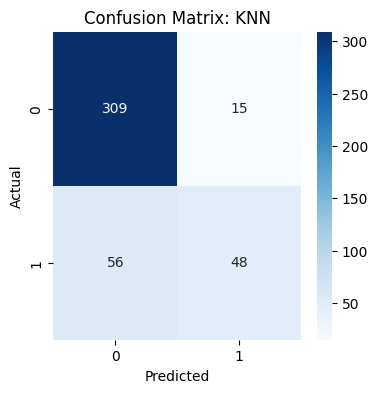

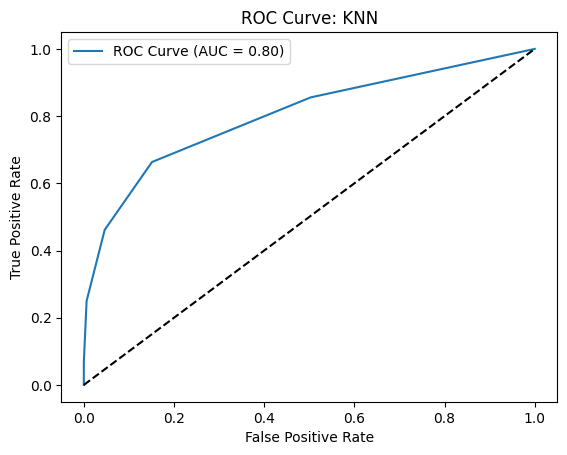

Akurasi: 0.834
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       324
           1       0.76      0.46      0.57       104

    accuracy                           0.83       428
   macro avg       0.80      0.71      0.74       428
weighted avg       0.83      0.83      0.82       428


======= Naive Bayes =======


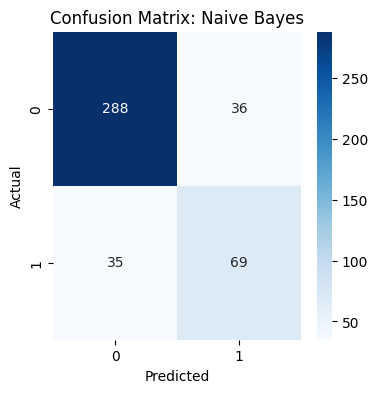

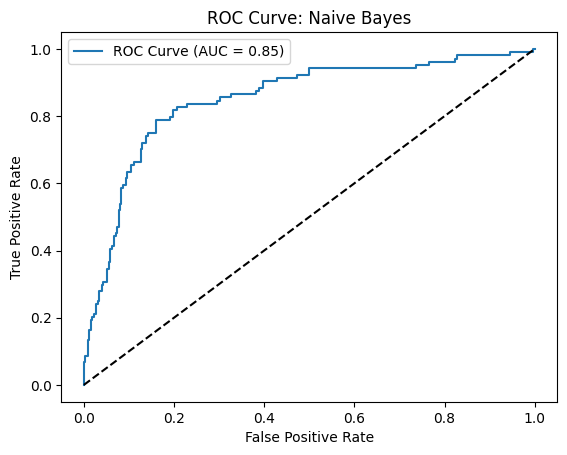

Akurasi: 0.834
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       324
           1       0.66      0.66      0.66       104

    accuracy                           0.83       428
   macro avg       0.77      0.78      0.78       428
weighted avg       0.83      0.83      0.83       428


======= ANN/MLP =======


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


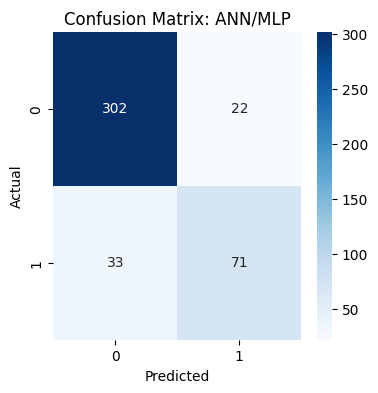

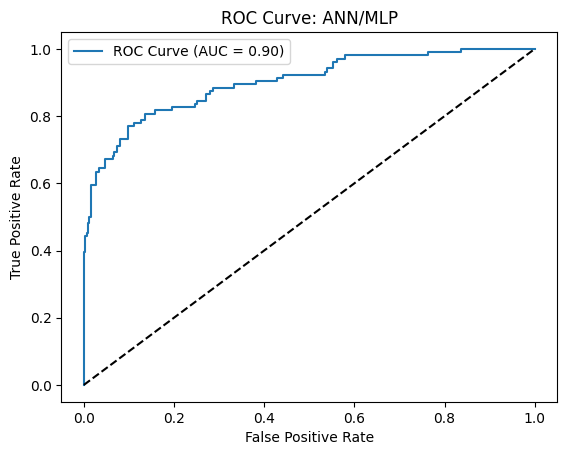

Akurasi: 0.871
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       324
           1       0.76      0.68      0.72       104

    accuracy                           0.87       428
   macro avg       0.83      0.81      0.82       428
weighted avg       0.87      0.87      0.87       428


======= Decision Tree =======


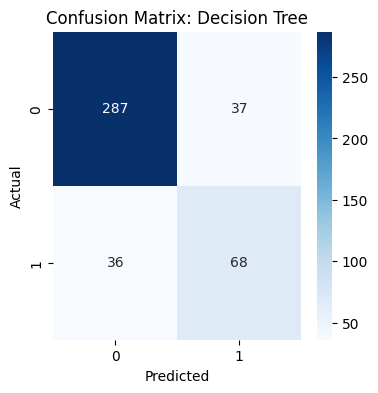

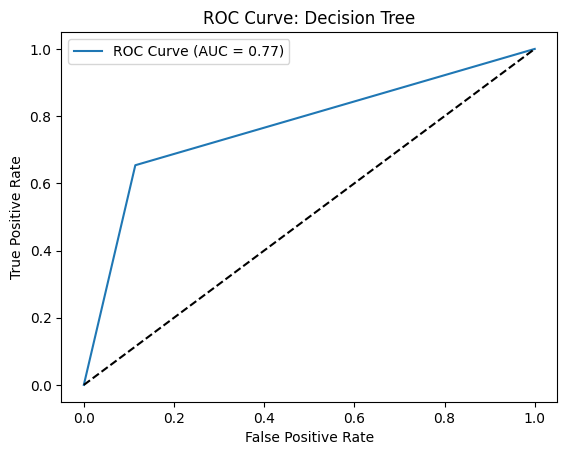

Akurasi: 0.829
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       324
           1       0.65      0.65      0.65       104

    accuracy                           0.83       428
   macro avg       0.77      0.77      0.77       428
weighted avg       0.83      0.83      0.83       428



In [81]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "ANN/MLP": MLPClassifier(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\n======= {name} =======")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Probabilitas prediksi kelas 1 (untuk ROC)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Untuk model tanpa predict_proba (SVM tanpa probability=True)
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

      # ROC Curve & AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {name}')
    plt.legend()
    plt.show()

    # Classification report
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred))

In [82]:
# Hyperparameter Tuning
print("\n=== GridSearchCV: Random Forest ===")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
print("Random Forest Best Params:", grid_rf.best_params_)
print("Random Forest Best CV AUC:", grid_rf.best_score_)

print("\n=== GridSearchCV: SVM ===")
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='roc_auc')
grid_svm.fit(X_train, y_train)
print("SVM Best Params:", grid_svm.best_params_)
print("SVM Best CV AUC:", grid_svm.best_score_)


=== GridSearchCV: Random Forest ===
Random Forest Best Params: {'max_depth': None, 'n_estimators': 200}
Random Forest Best CV AUC: 0.9305629451793843

=== GridSearchCV: SVM ===
SVM Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Best CV AUC: 0.9136481674977853



=== Evaluation of Best Random Forest ===
Akurasi: 0.8995327102803738
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       324
           1       0.82      0.75      0.78       104

    accuracy                           0.90       428
   macro avg       0.87      0.85      0.86       428
weighted avg       0.90      0.90      0.90       428



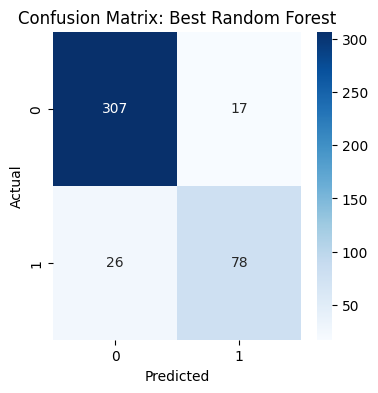

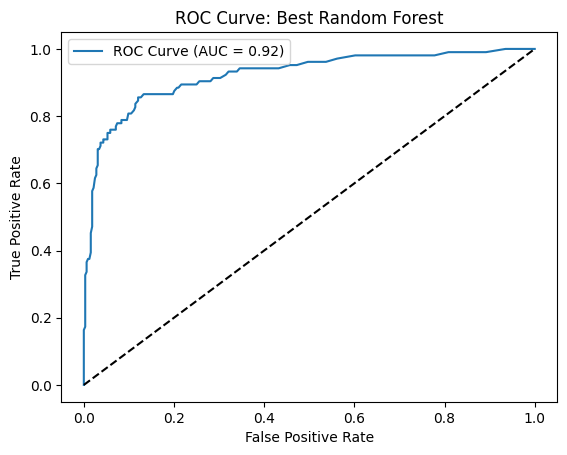


=== Evaluation of Best SVM ===
Akurasi: 0.883177570093458
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       324
           1       0.85      0.63      0.73       104

    accuracy                           0.88       428
   macro avg       0.87      0.80      0.83       428
weighted avg       0.88      0.88      0.88       428



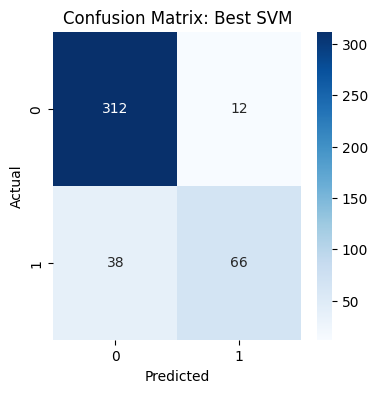

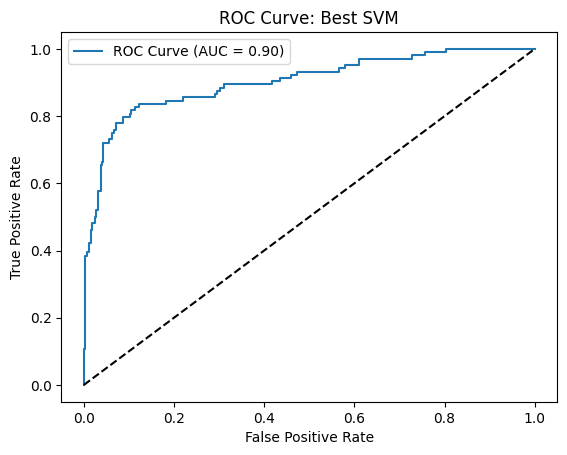

In [84]:
#Evaluasi Model Terbaik (Best Estimator)
print("\n=== Evaluation of Best Random Forest ===")
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Best Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Best Random Forest')
plt.legend()
plt.show()

print("\n=== Evaluation of Best SVM ===")
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]
print("Akurasi:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Best SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Best SVM')
plt.legend()
plt.show()